# Unsupervised Learning: In-Depth Theory & Evaluation


# Foundations of Machine Learning: A Comprehensive Analysis


![Example Image](https://datasciencedojo.com/wp-content/uploads/ml-ds-algos.jpg)

## Supervised Learning

Supervised learning operates within a framework defined by:

$\mathcal{D} = \{(x_i, y_i)\}_{i=1}^n$ where $x_i \in \mathbb{R}^d$ and $y_i \in \mathcal{Y}$

The objective function typically minimizes:

$\mathcal{L}(\theta) = \frac{1}{n}\sum_{i=1}^n l(f_\theta(x_i), y_i) + \lambda R(\theta)$

Key characteristics:
- Explicit learning signal through labeled data
- Direct performance metrics via prediction accuracy
- Applications in classification and regression tasks

## Unsupervised Learning

Given a dataset $X = \{x_1, ..., x_n\}$ where $x_i \in \mathbb{R}^d$, unsupervised learning pursues:

1. **Latent Structure Discovery**:
   - Clustering: $f: \mathbb{R}^d \rightarrow \{1,...,K\}$
   - Manifold Learning: $f: \mathbb{R}^d \rightarrow \mathbb{R}^m, m < d$

2. **Density Estimation**:
   - Explicit: Direct modeling of $P(X)$
   - Implicit: Learning through generative models

3. **Dimensionality Reduction**:
   - Linear: Principal Component Analysis (PCA)
   - Non-linear: t-SNE, UMAP

## Reinforcement Learning

Characterized by the Markov Decision Process (MDP) tuple:
$(S, A, P, R, \gamma)$

Where:
- $S$: State space
- $A$: Action space
- $P$: State transition probability
- $R$: Reward function
- $\gamma$: Discount factor

The objective is to learn a policy $\pi: S \rightarrow A$  with maximizing: $V^\pi(s) = \mathbb{E}_\pi[\sum_{t=0}^{\infty} \gamma^t R(s_t, a_t) | s_0 = s]$





# Dimensionality Reduction

Dimensionality reduction is a set of techniques that transform data from a high-dimensional space into a lower-dimensional space while preserving important properties. 

**Why Reduce Dimensions?**
   - *Curse of dimensionality* : As data dimensions increase, the space becomes exponentially larger and sparser. This makes statistical analysis harder as points become nearly equidistant, requiring exponentially more data for reliable analysis.
   - *Visualization*: Reducing high-dimensional data enables visual pattern recognition, exploratory analysis, and effective communication of findings.
   - *Computational efficiency*: Lower dimensions reduce storage, memory, and processing requirements. This enables faster model training and better scalability with limited computational resources.
   - *Noise reduction* :  Removing them improves signal-to-noise ratio and model performance by focusing on the most relevant dimensions.

**Types of Techniques**

 - Linear 
 - Non-linear

Btw, what we will do most of the time... ✨FIT AND TRANSFORM✨  

Think of fitting and transforming like learning a recipe:

1. **Fit (Learning)**
- Like learning the recipe's rules and measurements
- The model learns patterns, parameters, or "rules" from training data
- Example: In scaling, it learns the mean and standard deviation

2. **Transform (Applying)**
- Like following the recipe to cook new dishes
- Applies the learned rules to transform new data
- Example: In scaling, it applies the learned mean/std to normalize new data

3. **Fit_transform (Learning + Applying)**
- Like learning a recipe and immediately cooking with it
- Does both steps at once on the same data
- Common shorthand when you want to both learn and apply

Real-world Example:
```python
# Let's say we have height data in inches
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit (Learn): Calculate mean=168cm, std=3cm
scaler.fit(heights_data)

# Transform (Apply): Convert heights to standard units
# Example: 171 inches becomes (171-168)/3 = +1
normalized = scaler.transform(heights_data)

# Or do both at once
normalized = scaler.fit_transform(heights_data)
```

Think of it this way:
- Fit = Learn the rules (training)
- Transform = Apply the rules (using)
- Fit_transform = Learn and apply in one step

Just like you first learn a recipe (fit) before you can cook with it (transform)!


# Linear ⭐

# Principal Component Analysis (PCA)

PCA is a linear dimensionality reduction technique that projects high-dimensional data onto a lower-dimensional subspace while maximizing variance retention.


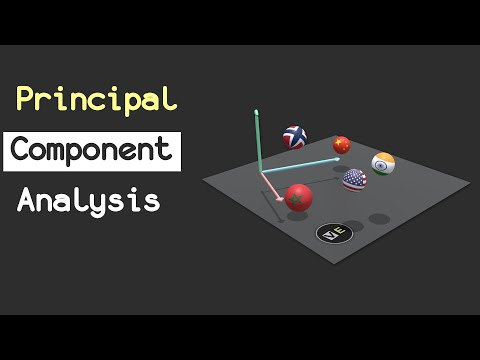

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('FD4DeN81ODY', width=800, height=300)


## Core Principles

* Maximizes variance in projected space by finding directions (principal components) where data varies most
* Uses eigen decomposition of covariance matrix to identify these orthogonal directions
* Components are ranked by explained variance, allowing dimension selection based on information retention

## Mathematical Steps

1. Standardize data: Center by subtracting mean and scale to unit variance
2. Compute covariance matrix: $Σ = X^T X / (n-1)$
3. Eigenvalue decomposition: $Σ = VΛV^T$
4. Select top-k eigenvectors based on explained variance ratio

## Optimization Problem

The mathematical formulation seeks to:

Maximize: $Var(w^T X) = w^T Σw$

Subject to: $w^Tw = 1$

Where:
- $w$: projection direction
- $X$: data matrix
- $Σ$: covariance matrix

## Properties

* First principal component captures maximum variance
* Each subsequent component is orthogonal to previous ones
* Components are sorted by decreasing eigenvalues (variance explained)
* Linear transformation preserves distances proportionally
* Lose some of the variance by moving to low-dimensional space

## Requirements
- All features must be numeric
    - Categorical variables need encoding before PCA
    - Text data require vectorization
- Data should be scaled to comparable ranges
    - Standardization ($\mu = 0, \sigma = 1$)
    - Min-max scaling ([0,1])
    - It prevents features with large value from dominating
    - Ensures PCA finds directions of maximum variance, not just scale differences
- Missing values should be handeld before applying PCA

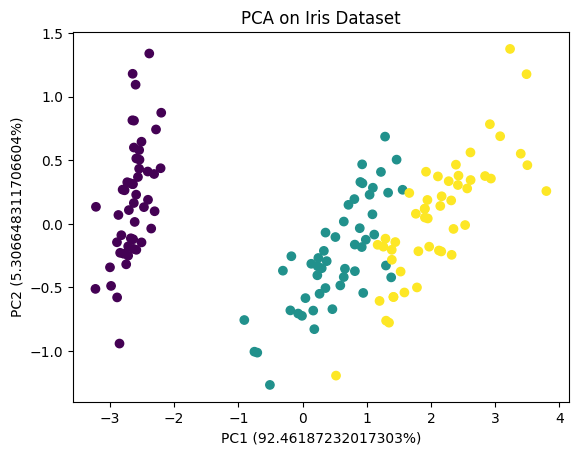

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

data = load_iris()
X, y = data.data, data.target

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.xlabel('PC1 ({}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 ({}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.title('PCA on Iris Dataset')
plt.show()

This visualization shows how PCA simplifies the 4-dimensional Iris dataset (sepal length, sepal width, petal length, petal width) into 2 dimensions while preserving the important patterns:

- The x-axis (PC1) captures 92% of data variation
- The y-axis (PC2) captures 5% of variation
- The three colors represent different Iris species

Think of it like taking a 3D object and looking at its shadow from the best angle - we can still recognize the shape even though we've reduced dimensions. Here, PCA found the "best angle" to view our 4D data in 2D, where we can clearly see the three different types of Iris flowers as separate clusters.


The high percentage (92%) on PC1 tells us that most of the important differences between Iris species can be seen along this single direction!

# Factor Analysis (FA)
FA is a statistical method that identifies underlying latent variables (factors) that explain patterns of correlations within observed variables.

## Core Principles
* Assumes observed variables are linear combinations of underlying factors
* Focuses on shared variance (communality) between variables
* Distinguishes between common and unique variance
* Factors represent hypothetical constructs
* Assumes Gaussian noise

## Mathematical Steps
1. Compute correlation/covariance matrix
2. Extract initial factors: $X = LF + E$
3. Factor rotation for interpretability
4. Estimate factor scores

## Mathematical Model
$$X_i = \sum_{j=1}^m l_{ij}F_j + e_i$$
Where:
- $X_i$: observed variable i
- $l_{ij}$: factor loading
- $F_j$: common factor j
- $e_i$: unique factor (error)

## Properties
* Factors are interpretable latent constructs
* Rotation preserves total variance explained
* Multiple rotation solutions possible
* Focus on relationships between variables

## Requirements
- Variables should be correlated
- Adequate sample size (>100)
- Continuous or ordinal data
- Testing for factorability:
    - KMO > 0.5
    - Bartlett's test significant
    - Correlation matrix inspection
- Missing values handled
- Outliers addressed

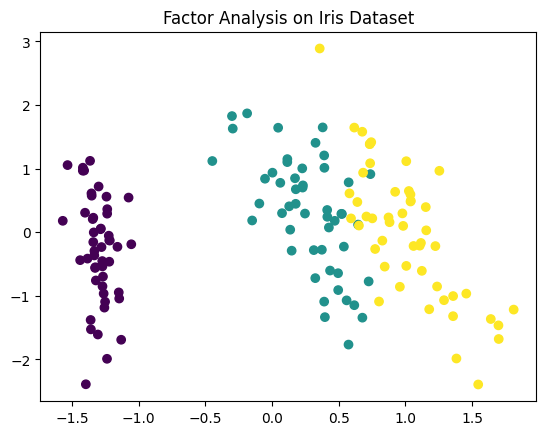

In [3]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X)

plt.scatter(X_fa[:,0], X_fa[:,1], c=y, cmap='viridis')
plt.title('Factor Analysis on Iris Dataset')
plt.show()

Similar to PCA, we see three clusters (purple, teal, yellow) representing the three Iris species. 
However, key differences from PCA:

  - Scale: FA axes have different ranges (-1.5 to 1.5) vs PCA (-3 to 4)

Interpretation:

- FA factors represent underlying latent traits
- PCA components maximize variance



Key distinction between FA and PCA:

- FA assumes latent factors cause observed variables
- PCA simply transforms data to maximize variance
- FA separates common variance from unique variance
- PCA works with total variance

In this Iris example, FA might interpret factors as underlying "size" and "shape" characteristics that cause the observed measurements, while PCA just finds directions of maximum variation.

# Independent Component Analysis (ICA)

ICA is a linear dimensionality reduction and source separation technique that seeks to find statistically independent components in high-dimensional data.

## Core Principles
* Assumes data is generated by mixing independent non-Gaussian sources
* Seeks to recover original source signals by finding an unmixing matrix
* Maximizes statistical independence rather than variance (unlike PCA)
* Components don't need to be orthogonal -two vectors can be independent without being perpendicular
* Often used in signal processing for blind source separation

## Mathematical Steps
1. Center the data: $X_{centered} = X - E[X]$
2. Whitening: Transform data to have unit variance and uncorrelated components
3. Estimate unmixing matrix W using optimization algorithms
4. Recover independent components: $S = WX$

## Optimization Problem
The mathematical formulation seeks to maximize: 

$I(s_1, ..., s_n) = \sum_i H(s_i) - H(s)$

Where:
- $I$: mutual information
- $H$: entropy
- $s_i$: individual components
- $s$: joint distribution

## Properties
* Components are statistically independent
* Solution is not unique up to scaling and permutation
* Cannot determine the order of independent components
* Assumes non-Gaussian source signals (except for one)
* More computationally intensive than PCA

## Requirements
- Data should be non-Gaussian
    - Gaussian sources cannot be separated using ICA
    - At most one Gaussian source is allowed
- Data should be preprocessed
    - Centering (zero mean)
    - Whitening (decorrelation and unit variance)
- Sample size should be sufficient
    - Typically needs more samples than PCA
    - Rule of thumb: n > 10d where d is dimension



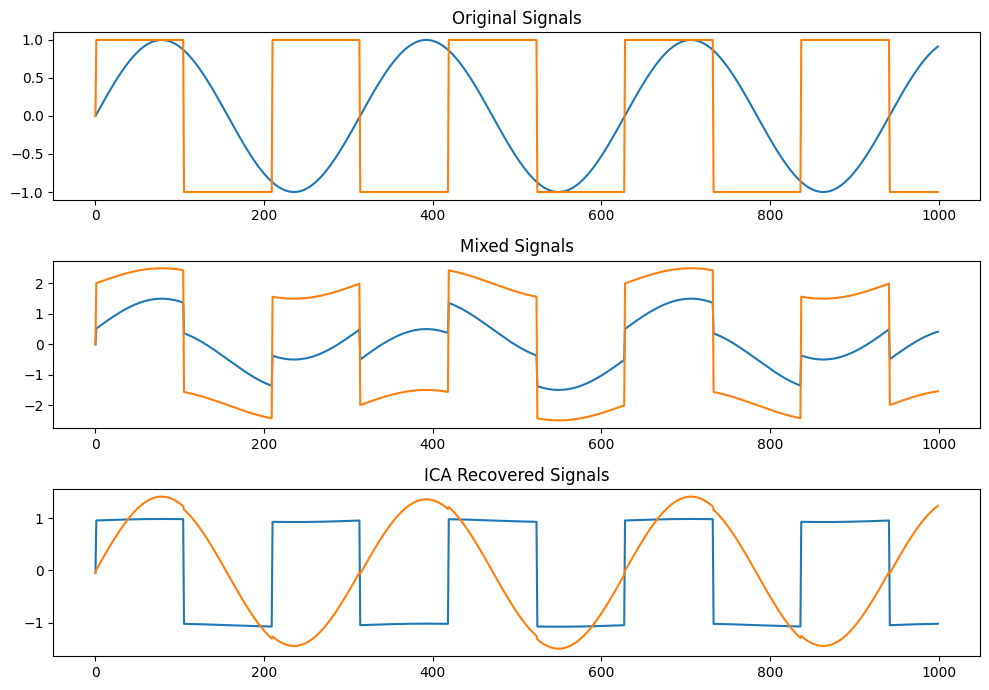

In [4]:
from sklearn.decomposition import FastICA
import numpy as np
import matplotlib.pyplot as plt

# Generate mixed signals
t = np.linspace(0, 10, 1000)
s1 = np.sin(2 * t)  # Sinusoidal signal
s2 = np.sign(np.sin(3 * t))  # Square signal
S = np.c_[s1, s2] #combine both signal

# Create mixing matrix and mix signals
A = np.array([[1, 0.5], [0.5, 2]])
X = np.dot(S, A.T)

# Apply ICA
ica = FastICA(n_components=2, random_state=0)
S_ = ica.fit_transform(X)

# Plot
plt.figure(figsize=(10, 7))

plt.subplot(3, 1, 1)
plt.title('Original Signals')
plt.plot(S)

plt.subplot(3, 1, 2)
plt.title('Mixed Signals')
plt.plot(X)

plt.subplot(3, 1, 3)
plt.title('ICA Recovered Signals')
plt.plot(S_)

plt.tight_layout()
plt.show()

This visualization demonstrates ICA's ability to separate mixed signals.
Notice how ICA recovers the original signal shapes, though possibly with different scaling and order. This is a classic example of the "cocktail party problem" where ICA can separate mixed audio signals into their original sources.

## Common Applications
1. Signal Processing
   - Audio source separation
   - EEG/MEG signal analysis
   - Image feature extraction

2. Financial Data Analysis
   - Risk factor decomposition
   - Trading strategy identification
   - Market microstructure analysis

3. Medical Imaging
   - fMRI data analysis
   - Artifact removal
   - Signal denoising

## Limitations
- Cannot recover exact amplitude of source signals
- Order of components is arbitrary
- Assumes linear mixing of sources
- Sensitive to noise and outliers
- Computationally more intensive than PCA

## Comparison with PCA
1. Independence vs Orthogonality
   - ICA: Statistical independence
   - PCA: Orthogonal components

2. Optimization Criterion
   - ICA: Maximizes independence
   - PCA: Maximizes variance

3. Component Order
   - ICA: No natural ordering (Components are found based on statistical independence, not variance)
   - PCA: Ordered by variance explained

**obs.** This makes it harder to choose which components to keep - you need to look at what each component represents in your specific context

4. Gaussian Data
   - ICA: Cannot separate Gaussian sources
   - PCA: Works well with Gaussian data
   
   
**Example:**
Imagine you have a recording of three people talking in a room. 

**With ICA**:

Each component would represent one person's voice
But ICA won't tell you which person is "most important"
The first component might be Person A in one run and Person C in another run
You'd need to look at the actual content of each component to decide which ones matter for your analysis

This is different from PCA, where if you ran it multiple times on the same data, you'd always get the components in the same order of importance based on variance.

In [5]:
import librosa
import sounddevice as sd

# Load the voice recordings
person_a, fs = librosa.load('absolute_end.wav', sr=None)
person_b, _ = librosa.load('dont_tell.wav', sr=fs)
disturbance, _ = librosa.load('mixkit-police-siren-us-1643.wav', sr=fs)

# Ensure all signals are the same length
min_length = min(len(person_a), len(person_b), len(disturbance))
person_a = person_a[:min_length]
person_b = person_b[:min_length]
disturbance = disturbance[:min_length]


In [6]:

# Create 3 mixed signals
mixed_signal1 = person_a + 0.5 * person_b + 0.3 * disturbance
mixed_signal2 = 0.5 * person_a + person_b + 0.3 * disturbance
mixed_signal3 = 0.3 * person_a + 0.3 * person_b + disturbance

# Stack the mixed signals into a 2D array
mixed_signals = np.vstack((mixed_signal1, mixed_signal2, mixed_signal3))

# Play the mixed signals
print("Playing mixed signal 1 (Person A + Person B + Disturbance)...")
sd.play(mixed_signal1, fs)
sd.wait()

print("Playing mixed signal 2 (Person A + Person B + Disturbance)...")
sd.play(mixed_signal2, fs)
sd.wait()

print("Playing mixed signal 3 (Person A + Person B + Disturbance)...")
sd.play(mixed_signal3, fs)
sd.wait()

# Apply ICA
ica = FastICA(n_components=3)  # Now we can separate 3 components
separated_signals = ica.fit_transform(mixed_signals.T).T

# Play the separated signals
print("Playing separated signal 1 (Person A)...")
sd.play(separated_signals[0], fs)
sd.wait()

print("Playing separated signal 2 (Person B)...")
sd.play(separated_signals[1], fs)
sd.wait()

print("Playing separated signal 3 (Disturbance)...")
sd.play(separated_signals[2], fs)
sd.wait()

Playing mixed signal 1 (Person A + Person B + Disturbance)...
Playing mixed signal 2 (Person A + Person B + Disturbance)...
Playing mixed signal 3 (Person A + Person B + Disturbance)...
Playing separated signal 1 (Person A)...
Playing separated signal 2 (Person B)...
Playing separated signal 3 (Disturbance)...


# Multiple Correspondence Analysis (MCA)

MCA is a dimension reduction technique specifically designed for analyzing relationships between categorical variables.

## Core Principles
* Extends Correspondence Analysis to multiple categorical variables
* Converts categorical data into indicator (dummy) matrix
* Reveals patterns and associations between categories
* Projects categories and observations in same space

## Mathematical Steps
1. Create indicator matrix Z from categorical data
2. Calculate matrix of standardized residuals
3. Perform SVD: $P - rc^T = UDV^T$
4. Extract coordinates for categories and observations

## Mathematical Model
$X = ZM$
Where:
- $Z$: indicator matrix
- $M$: matrix of category weights
- $X$: coordinates in reduced space

## Properties
* Preserves chi-square distances
* Symmetric visualization of variables
* Interpretable through relative positions
* Accounts for frequency of categories

## Requirements
- Categorical variables only
- Sufficient sample size
- Complete cases (no missing values)
- Meaningful categories:
    - Not too many rare categories
    - Not too many categories per variable
- Relationships between variables exist
    - Test with chi-square
    - Cramer's V coefficient


In [7]:
#!pip3 install prince


Frequency Table:
Size   L   M   S  XL
Color               
Black  9   6   4   4
Blue   5  12   7   5
Red    6   3  14   2
White  6   2   3  12

Category Coordinates:
                     0         1
Color__Black  0.088827  0.415995
Color__Blue  -0.235536  1.005319
Color__Red   -1.052102 -0.971100
Color__White  1.351743 -0.628028
Size__L       0.127042 -0.099456
Size__M      -0.277825  1.417321
Size__S      -0.994496 -0.759492
Size__XL      1.344903 -0.380295


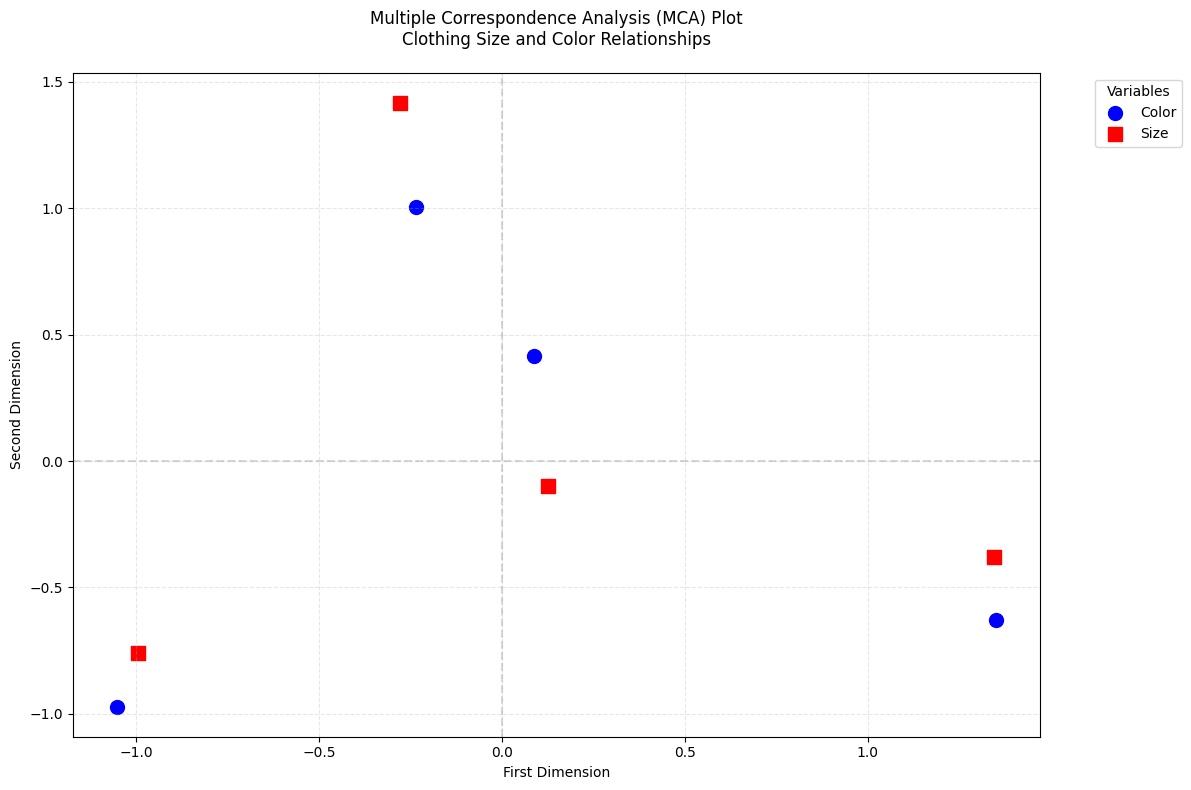

In [8]:
import prince
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(42)  # For reproducibility

# Create sample data 
n_samples = 100
colors = ['Red', 'Blue', 'Black', 'White']
sizes = ['S', 'M', 'L', 'XL']

# Create patterns in the data
data = pd.DataFrame({
    'Color': [
        # Red more common in S and M
        *np.random.choice(['Red'] * 60 + ['Blue'] * 20 + ['Black'] * 10 + ['White'] * 10, 25),
        # Blue more common in M and L
        *np.random.choice(['Red'] * 20 + ['Blue'] * 60 + ['Black'] * 10 + ['White'] * 10, 25),
        # Black more common in L and XL
        *np.random.choice(['Red'] * 10 + ['Blue'] * 20 + ['Black'] * 60 + ['White'] * 10, 25),
        # White more common in XL and S
        *np.random.choice(['Red'] * 10 + ['Blue'] * 10 + ['Black'] * 20 + ['White'] * 60, 25)
    ],
    'Size': [
        # First quarter mainly S
        *np.random.choice(['S'] * 60 + ['M'] * 20 + ['L'] * 10 + ['XL'] * 10, 25),
        # Second quarter mainly M
        *np.random.choice(['S'] * 20 + ['M'] * 60 + ['L'] * 10 + ['XL'] * 10, 25),
        # Third quarter mainly L
        *np.random.choice(['S'] * 10 + ['M'] * 20 + ['L'] * 60 + ['XL'] * 10, 25),
        # Fourth quarter mainly XL
        *np.random.choice(['S'] * 10 + ['M'] * 10 + ['L'] * 20 + ['XL'] * 60, 25)
    ]
})

# Initialize and fit MCA
mca = prince.MCA(n_components=2, random_state=42)
mca_coords = mca.fit(data)
coordinates = mca.column_coordinates(data)

plt.figure(figsize=(12, 8))

# Plot points for each variable
markers = ['o', 's']  # Different markers for different variables
for i, (variable, color, marker) in enumerate(zip(['Color', 'Size'], ['blue', 'red'], markers)):
    variable_coords = coordinates[coordinates.index.str.startswith(f"{variable}_")]
    
    # Plot points
    plt.scatter(variable_coords[0], variable_coords[1],
                color=color,
                marker=marker,
                s=100,
                label=variable)
    
    # Add labels
    for idx, row in variable_coords.iterrows():
        category = idx.split('_')[1]
        plt.annotate(category, 
                    (row[0], row[1]),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=10)

# Customize grid and spines
plt.grid(True, linestyle='--', alpha=0.3)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.3)

# Set labels and title
plt.title('Multiple Correspondence Analysis (MCA) Plot\nClothing Size and Color Relationships', pad=20)
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')

# Customize legend
plt.legend(title='Variables', 
          bbox_to_anchor=(1.05, 1),
          loc='upper left',
          frameon=True)

# Adjust layout
plt.tight_layout()

# Print frequencies and coordinates
print("\nFrequency Table:")
print(pd.crosstab(data['Color'], data['Size']))
print("\nCategory Coordinates:")
print(coordinates)

plt.show()

The plot above is showing us how different clothing sizes and colors are related to each other in the data.

Each point on the plot represents either a size (S, M, L, XL) or a color (Red, Blue, Black, White)


The red squares (■) show sizes while the blue circles (●) show colors


The key thing is: **when points are close to each other, it means those characteristics often appear together in the data.**


When the table shows a high number (like 14 for Red and S), those points appear close together on the plot
When the table shows a low number (like 2 for Red and XL), those points are far apart on the plot

For example, from the frequency table:

|  | L | M | S | XL |
|-------|---|---|---|----|
| Black | 9 | 6 | 4 | 4  |
| Blue  | 5 | 12| 7 | 5  |
| Red   | 6 | 3 | 14| 2  |
| White | 6 | 2 | 3 | 12 |

- Red clothes are most common in size S (14 items)
- White clothes are most common in size XL (12 items)
- Blue clothes are most common in size M (12 items)
- Black clothes are most common in size L (9 items)


The new dimensions from MCA help you understand and use the data in several ways:

Dimension Reduction:
- First Dimension (x-axis) separates large sizes (XL) from small sizes (S)
- Second Dimension (y-axis) separates medium sizes from extreme sizes

Practical Applications:
- Inventory Planning: You could use these patterns to stock your store more efficiently
  - Example: Order more Red items in Small sizes since they're strongly associated
  - Example: Stock more White clothes in XL sizes

Pattern Discovery:
- These components reveal natural groupings in the data:
  - Red clothes → Small sizes
  - Blue clothes → Medium sizes
  - White clothes → XL sizes
  - Black clothes → More evenly distributed

Feature Creation:
- You can use these new coordinates as features for other analyses:
  - Clustering similar products
  - Creating recommendation systems
  - Market basket analysis

Visualization:
- The plot gives you an easy way to explain relationships to others
- You can quickly identify unusual or expected combinations



# Non Linear 👀 

# **t-Distributed Stochastic Neighbor Embedding (t-SNE)**

t-SNE is a nonlinear dimensionality reduction technique that emphasizes the preservation of local structure in data while enabling effective visualization of high-dimensional datasets through probabilistic mapping.

## **Core Principles**
* Converts high-dimensional Euclidean distances between datapoints into conditional probabilities that represent similarities
* Constructs a similar probability distribution in the low-dimensional space using Student's t-distribution
* Minimizes the Kullback-Leibler divergence between the two distributions
* Preserves local structure by giving more weight to maintaining short distances than long distances

## **Mathematical Formulation**
The algorithm proceeds in two stages:

1. High-dimensional probability distribution P:
   $p_{j|i} = \frac{\exp(-||x_i - x_j||^2/2σ_i^2)}{\sum_{k≠i}\exp(-||x_i - x_k||^2/2σ_i^2)}$
   $p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}$

2. Low-dimensional probability distribution Q:
   $q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k≠l}(1 + ||y_k - y_l||^2)^{-1}}$

## **Optimization Problem**
The objective is to minimize the Kullback-Leibler divergence ( two joint probability distributions P and Q):
$$C = KL(P||Q) = \sum_i \sum_j p_{ij} \log(\frac{p_{ij}}{q_{ij}})$$

Components:
- $p_{ij}$: Joint probability distribution P
- $q_{ij}$: Joint probability distribution Q
- $\log(\frac{p_{ij}}{q_{ij}})$: Log ratio of probabilities

Key properties:
1. KL(P||Q) ≥ 0 (non-negative)
2. KL(P||Q) = 0 if and only if P = Q
3. Not symmetric: KL(P||Q) ≠ KL(Q||P)

This measures the relative entropy or information divergence between two probability distributions.

Using gradient descent with momentum:
$\frac{\partial C}{\partial y_i} = 4\sum_j(p_{ij} - q_{ij})(y_i - y_j)(1 + ||y_i - y_j||^2)^{-1}$

where the gradient includes :
1. $q_{ij}$ here is defined using Student's t-distribution:
   $q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq l}(1 + ||y_k - y_l||^2)^{-1}}$

2. The gradient includes:
   - $(y_i - y_j)$: Direction vector between points
   - $(1 + ||y_i - y_j||^2)^{-1}$: Student's t-distribution term
   - $(p_{ij} - q_{ij})$: Difference between input and output distributions

In this way the gradient minimize the KL-divergence between P and Q while maintaining the t-distributed structure of the lower-dimensional embedding. Which means in easy word that the distance is preserved so points that are close in high dimensions will be close in low dimensions. Also, using the t-distribution instead of Gaussian allows point to be more spread out in low dimensions.

**obs.** The Kullback-Leibler (KL) divergence measures how different two probability distributions are from each other. Think of it as calculating how much information you lose when you try to approximate one distribution with another.
For example, if you're trying to model real-world data (P) with a simpler model (Q), the KL divergence tells you how good your approximation is - smaller values mean better approximation.
## **Key Parameters**
* Perplexity: Controls the effective number of neighbors (typical range: 5-50)
    - Balances attention between local and global aspects of data
    - Usually robust between 5 and 50
    - Higher values consider more global structure
* Learning rate: Affects optimization stability and convergence
* Number of iterations: Determines quality of final embedding
* Early exaggeration: Initially inflates P-distribution to create space between clusters

## **Advantages and Limitations**

Advantages:
* Excellent at revealing clusters and local structure
* Preserves nonlinear relationships
* Robust to dimensionality curse
* Particularly effective for visualization (2D/3D)

Limitations:
* Non-convex optimization - different runs may yield different results
* Computationally intensive - O(n²) complexity
* Cannot meaningfully embed new points without rerunning
* Loss of global structure - distances between clusters may not be meaningful


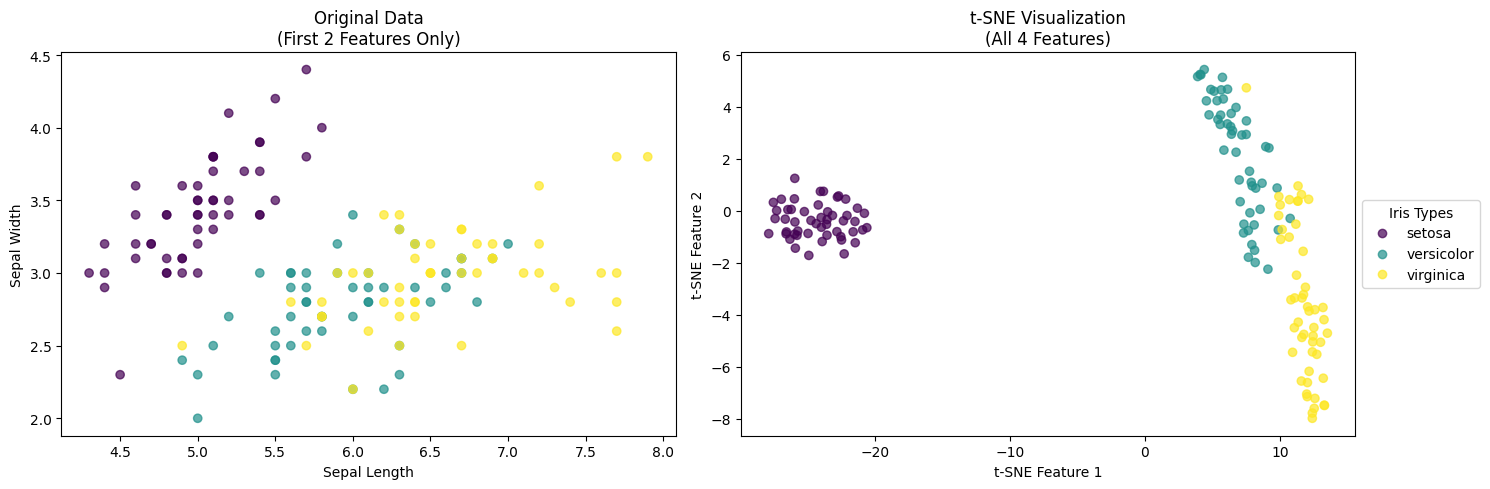

In [9]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create figure with two subplots side by side
plt.figure(figsize=(15, 5))

# Original data visualization (using first two features)
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('Original Data\n(First 2 Features Only)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Apply t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate='auto',
    max_iter=1000,
    random_state=42
)
X_tsne = tsne.fit_transform(X)

# t-SNE visualization
plt.subplot(122)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization\n(All 4 Features)')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')

# Add legend
plt.legend(
    scatter.legend_elements()[0], 
    iris.target_names,
    title="Iris Types",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.show()

The plots above demonstrate t-SNE's ability to find and preserve the underlying structure in the full 4-dimensional dataset, making it easier to visualize the natural groupings of the different iris species.

- All similar flowers got clustered together
- Different types of flowers got separated
- The original messy data became clear groups

Btw, the main difference from PCA (the other method we looked at):

PCA is like taking a shadow of an object - it's simple but might miss some details
t-SNE is more like carefully arranging things to preserve relationships - it takes more work but often gives better results for visualization


## **Best Practices**
* Pre-process data appropriately:
    - Scale features to comparable ranges
    - Remove noise and outliers
    - Consider initial dimensionality reduction with PCA
* Experiment with perplexity values
* Run multiple times with different random seeds
* Use early stopping for initial exploration
* Consider using approximation methods for large datasets (Barnes-Hut t-SNE)



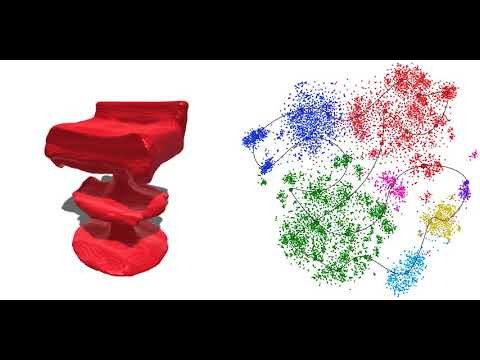

In [10]:
YouTubeVideo('C_XNdGGs6qM', width=800, height=300)



# Kernel Principal Component Analysis (KPCA)
KPCA extends PCA to handle non-linear relationships in data by implicitly mapping data to a higher-dimensional feature space where linear PCA is performed.

## Core Principles
* Performs non-linear dimensionality reduction
* Uses kernel trick to avoid explicit computation in high-dimensional space
* Can capture complex patterns that linear PCA cannot detect
* Choice of kernel determines the type of non-linearity captured

## Mathematical Steps
1. Choose a kernel function K(x,y)
2. Compute the kernel matrix: $K_{ij} = K(x_i,x_j)$
3. Center the kernel matrix:
   $$K_{centred} = K - 1_nK - K1_n + 1_nK1_n$$
4. Solve eigenvalue problem:
   $$K\alpha = n\lambda\alpha$$
5. Project data using eigenvectors

## Mathematical Model
For a new point x, projection onto kth component:
$$y_k(x) = \sum_{i=1}^n \alpha_i^k K(x_i,x)$$
Where:
- $\alpha_i^k$: ith element of kth eigenvector
- $K(x_i,x)$: kernel function between training point $x_i$ and new point x

## Common Kernel Functions
1. RBF (Gaussian):
   $$K(x,y) = exp(-\gamma||x-y||^2)$$
2. Polynomial:
   $$K(x,y) = (x^Ty + c)^d$$
3. Sigmoid:
   $$K(x,y) = tanh(\gamma x^Ty + c)$$

## Requirements
- Appropriate kernel selection
- Parameter tuning:
    - Kernel parameters (e.g., γ for RBF)
    - Number of components
- Standardized features
- No missing values
- Sufficient memory for kernel matrix (n×n)

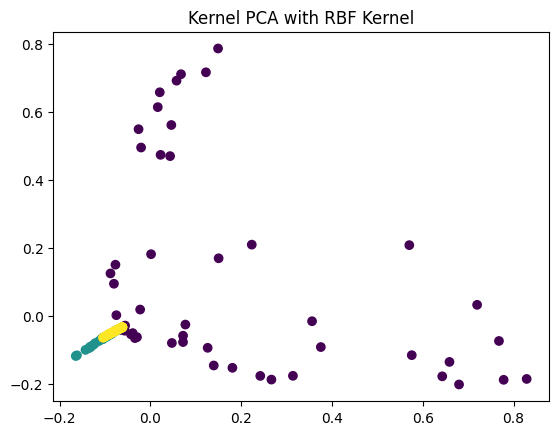

In [11]:
from sklearn.decomposition import KernelPCA
# RBF kernel
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y, cmap='viridis')
plt.title('Kernel PCA with RBF Kernel')
plt.show()

Comparison with PCA:
- KPCA can capture non-linear patterns while PCA is limited to linear relationships
- KPCA is more computationally intensive (O(n³) vs O(p³) for PCA)
- KPCA requires kernel parameter tuning
- Memory requirements scale quadratically with sample size in KPCA
- Pre-image problem: difficult to reconstruct original features from KPCA components
- Less interpretable than PCA components

Example applications:
- Face recognition with pose variations
- Handwritten digit classification
- Gene expression analysis
- Non-linear feature extraction in computer vision

# About Kernel...

A kernel is a mathematical function k(x,y) that computes the inner product ⟨φ(x), φ(y)⟩ in a high-dimensional feature space without explicitly computing the mapping φ. This is known as the "kernel trick".

A kernel function k: X × X → ℝ is a function that satisfies:

For all x, y ∈ X:
1. Symmetric property: k(x,y) = k(y,x)
2. Positive semi-definite: For any finite set {x₁,...,xₙ} ⊆ X, the matrix K where Kᵢⱼ = k(xᵢ,xⱼ) is positive semi-definite.

## Mercer's Theorem
A kernel function k(x,y) can be expressed as:
$$k(x,y) = \sum_{i=1}^{\infty} \lambda_i \phi_i(x)\phi_i(y)$$
Where:
- λᵢ ≥ 0 are eigenvalues
- φᵢ are eigenfunctions
- The series converges uniformly

## Feature Space Representation
The kernel defines an implicit mapping φ: X → H where H is a Reproducing Kernel Hilbert Space (RKHS):
$$k(x,y) = \langle \phi(x), \phi(y) \rangle_H$$

This allows computation of inner products in H without explicitly computing φ(x) and φ(y), which might be infinite-dimensional.

Kernels provide a mathematically way to perform computations in high-dimensional feature spaces while working only with inner products in the input space, leveraging the theory of reproducing kernel Hilbert spaces and functional analysis.


## In simplest words...
Imagine you have points on a piece of paper (2D space) that you can't separate with a straight line. That's where kernels come in - they're like magical tools that lift your paper into a 3D space where you can separate the points more easily!


1. **The Main Idea**


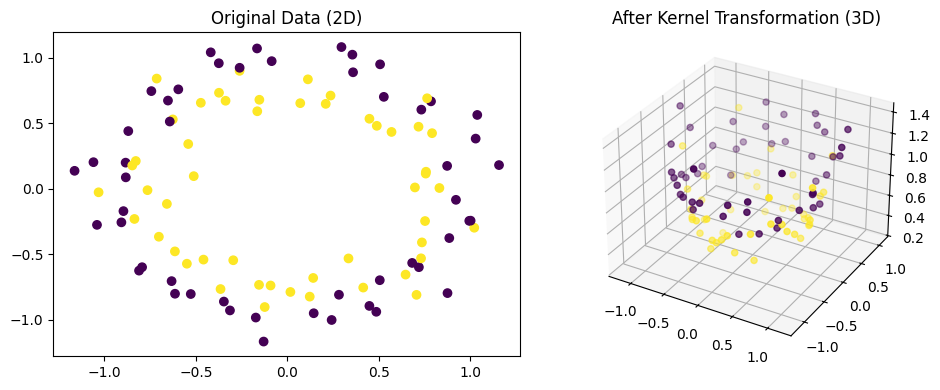

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Create non-linear data (concentric circles)
X, y = make_circles(n_samples=100, noise=0.1, random_state=42)

# Plot original data
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Original Data (2D)')

# Create a new 3D feature using kernel trick idea
z = X[:, 0]**2 + X[:, 1]**2  # Square distance from origin
X_3d = np.c_[X, z]

# Plot 3D data
ax = plt.subplot(122, projection='3d')
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y, cmap='viridis')
plt.title('After Kernel Transformation (3D)')
plt.tight_layout()
plt.show()



2. **Types of Kernels**
Think of kernels like different Instagram filters - each one transforms your data differently:

a) **RBF Kernel (Most Popular)**
- Like measuring how close points are to each other
- Works like a heat map - closer points have stronger relationships


```python
def rbf_kernel(x, y, gamma=1):
    return np.exp(-gamma * np.sum((x - y)**2))
```

- Small $\gamma$ (0.01) means points stay close together - less separation
- Medium $\gamma$ (1) better separation between clusters
- Lage $\gamma$ (100) points speread far apart - potential overfitting

b) **Polynomial Kernel**
- Like raising your data to a power
- Good for data that follows curves
```python
def poly_kernel(x, y, degree=2):
    return (np.dot(x, y) + 1)**degree
```

3. **Why Use Kernels?**


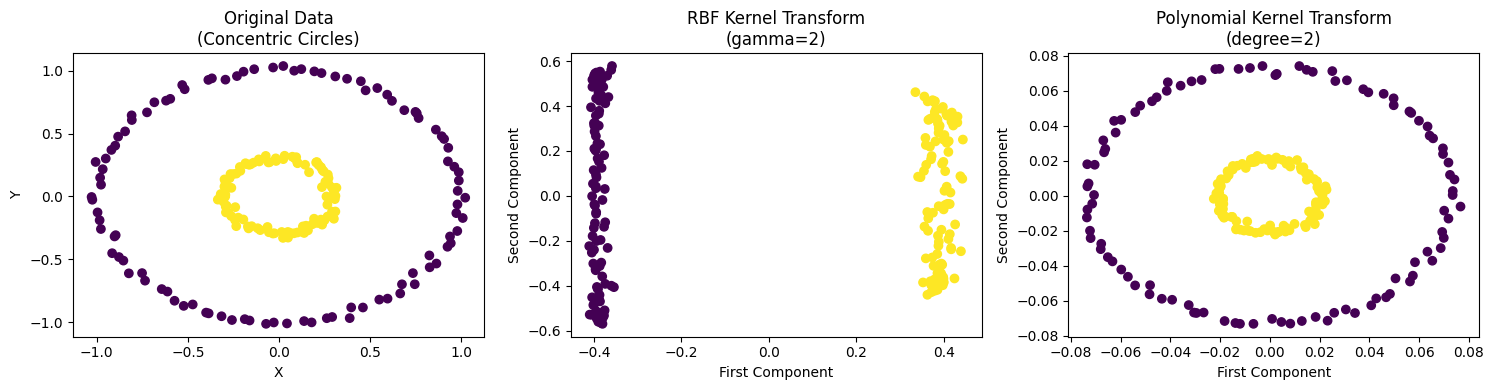

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA

# Create concentric circles dataset
X, y = make_circles(n_samples=200, noise=0.02, factor=0.3, random_state=42)

# Create the plot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original data
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
axes[0].set_title('Original Data\n(Concentric Circles)')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

# RBF Kernel (with a carefully chosen gamma)
kpca_rbf = KernelPCA(n_components=2, kernel='rbf', gamma=2)
X_rbf = kpca_rbf.fit_transform(X)
axes[1].scatter(X_rbf[:, 0], X_rbf[:, 1], c=y, cmap='viridis')
axes[1].set_title('RBF Kernel Transform\n(gamma=2)')
axes[1].set_xlabel('First Component')
axes[1].set_ylabel('Second Component')

# Polynomial Kernel
kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=0.01)
X_poly = kpca_poly.fit_transform(X)
axes[2].scatter(X_poly[:, 0], X_poly[:, 1], c=y, cmap='viridis')
axes[2].set_title('Polynomial Kernel Transform\n(degree=2)')
axes[2].set_xlabel('First Component')
axes[2].set_ylabel('Second Component')

plt.tight_layout()
plt.show()

1. **Original Data**
- We have two perfect circles: outer (purple) and inner (yellow)
- This is a classic example where you can't separate the classes with a straight line
- The circles are concentric (share same center) but different sizes

2. **RBF Kernel Transform**
- HERE'S THE MAGIC! 👀
- The circles have been "unfolded" into two separate vertical lines
- Purple points are all on the left, yellow points on the right
- Now you can easily separate them with a straight vertical line
- This is perfect for classification because the classes are now linearly separable!

3. **Polynomial Kernel Transform**
- Hmm... this isn't as helpful
- The data still looks like concentric circles
- We haven't really solved our separation problem
- Shows that RBF kernel is better for this circular pattern

The key takeaway:
- RBF kernel was great! It transformed impossible-to-separate circles into easy-to-separate lines
- Polynomial kernel wasn't helpful here - it kept the circular pattern
- This shows why choosing the right kernel for your data pattern is super important!

This is a perfect example of why RBF kernels are often the default choice - they're really good at handling circular or radial patterns in data. It's like magically "unwrapping" the circles into lines!

4. **Real-World Analogy**
Imagine you're trying to separate oranges and apples:
- In 2D (just looking at width and height), they might overlap
- But if you add a third dimension (like weight or color), they become easier to separate
- That's what kernels do - they add new ways to look at your data!

5. **When to Use Different Kernels**
- RBF: When you don't know much about your data (good default)
- Polynomial: When your data follows curves (but still preferable use RBF trust me ;) )
- Linear: When your data can be separated with straight lines

The key is that kernels help us deal with complex patterns in data by transforming it into a space where these patterns become simpler to work with!


# **Uniform Manifold Approximation and Projection (UMAP)**

UMAP represents a significant advancement in manifold learning and dimensionality reduction, offering a theoretical foundation based on Riemannian geometry and algebraic topology. This technique provides efficient, high-quality dimensionality reduction while preserving both local and global structure.

## **Theoretical Foundation**

UMAP's mathematical framework rests upon three fundamental principles:

1. Riemannian Manifold Construction
   * Assumes data exists on a uniformly distributed manifold
   * Constructs local fuzzy simplicial sets from the manifold
   * Utilizes exponential decay of connectivity with distance

2. Topological Structure Representation
   * Employs fuzzy topology to model local neighborhood relationships
   * Constructs a weighted graph representation of the manifold
   * Preserves the essential topological features of the high-dimensional space

## **Mathematical Formulation**

The algorithm proceeds through several distinct phases:

1. Local Connectivity Computation:
   $$σ_i = \min\{\sigma : \sum_{j≠i}\exp(-\frac{\max(0, d(x_i,x_j) - ρ_i)}{σ}) = \log_2(k)\}$$

2. Fuzzy Set Construction:
   $$μ_{(X,d,ρ,σ)}(x_i, x_j) = \exp(-\frac{\max(0, d(x_i,x_j) - ρ_i)}{σ_i})$$

3. Low-dimensional Layout Optimization:
   $$C = \sum_{i,j} v_{ij}\log(\frac{v_{ij}}{w_{ij}}) + (1-v_{ij})\log(\frac{1-v_{ij}}{1-w_{ij}})$$

Where:
- $d(x_i,x_j)$: Distance between points in high-dimensional space
- $ρ_i$: Distance to nearest neighbor of point i
- $σ_i$: Local connectivity parameter
- $v_{ij}$: High-dimensional fuzzy set membership
- $w_{ij}$: Low-dimensional fuzzy set membership

## **Optimization Process**

UMAP employs a stochastic gradient descent approach with the following characteristics:

1. Cross-entropy-based Objective Function:
   * Minimizes the cross-entropy between high and low-dimensional fuzzy simplicial sets
   * Incorporates both attractive and repulsive forces
   * Uses negative sampling for computational efficiency

2. Force-directed Layout:
   * Attractive force: $-2ab\frac{v_{ij}w_{ij}^{b-1}}{ε+||y_i-y_j||_2^2}(y_i-y_j)$
   * Repulsive force: $2b\frac{(1-v_{ij})(1-w_{ij})^{b-1}}{ε+||y_i-y_j||_2^2}(y_i-y_j)$

## **Key Parameters**

* n_neighbors: Controls local neighborhood size
    - Affects preservation of local versus global structure
    - Typical range: 5-50, default 15
    - Higher values capture more global structure

* min_dist: Minimum distance between points in low dimension
    - Controls compactness of embedding
    - Range: 0.0-1.0, default 0.1
    - Smaller values create tighter clusters

* n_components: Output dimensionality
    - Typically 2 or 3 for visualization
    - Can be any value less than input dimensionality
    


In [14]:
#!pip install protobuf==3.20.0

C:\Users\Dilet\AppData\Roaming\Python\Python39\site-packages\numba\np\ufunc\parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


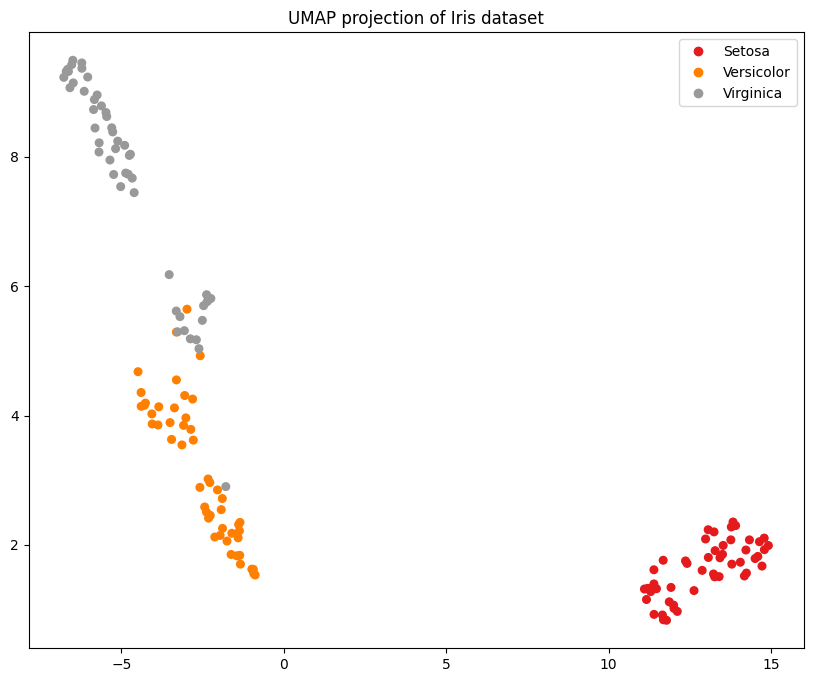

In [15]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP

# Load the iris dataset
iris = load_iris()
data = iris.data
labels = iris.target

# Create and fit UMAP
reducer = UMAP(n_neighbors=15, # Number of neighboring points
              n_components=2,  # Reduce to 2 dimensions
              random_state=42) # For reproducibility
embedding = reducer.fit_transform(data)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], 
                     embedding[:, 1], 
                     c=labels,           # Color points by iris class
                     cmap='Set1',    # Color map
                     s=30)                # Point size

# Add legend
plt.legend(handles=scatter.legend_elements()[0], 
          labels=['Setosa', 'Versicolor', 'Virginica'])

plt.title('UMAP projection of Iris dataset')
plt.show()

UMAP dimensionality reduction of the Iris dataset from 4 dimensions (sepal length, sepal width, petal length, petal width) to 2 dimensions. The visualization shows three distinct clusters representing different Iris species: Setosa (red), Versicolor (orange), and Virginica (grey). 
Key insights: 
-  Setosa is completely separated, indicating it has very distinctive features from the other species 
-  Versicolor and Virginica show some overlap in their characteristics, suggesting they share some similar features
-  The relative distances between clusters represent how different the species are from each other in the original 4D space. 

This projection demonstrates UMAP's ability to preserve both local relationships (similar flowers stay close together) and global structure (overall separation of species) while reducing dimensionality.

**obs.** take a look also on ISOMAP 


## **Advantages Over t-SNE**

1. Theoretical Foundation
   * Based on rigorous mathematical framework
   * Preserves both local and global structure
   * Theoretically principled parameter selection

2. Computational Efficiency
   * O(nlogn) complexity versus O(n²) for t-SNE
   * Significantly faster on large datasets
   * Supports incremental learning

3. Practical Benefits
   * Preserves global structure better than t-SNE
   * More stable to random initialization
   * Supports supervised dimensionality reduction

## **Implementation Considerations**

1. Data Preprocessing
   * Scale features to comparable ranges
   * Handle missing values appropriately
   * Consider initial dimensionality reduction for very high-dimensional data

2. Parameter Tuning
   * Adjust n_neighbors based on dataset size and structure
   * Modify min_dist to control clustering behavior
   * Consider metric selection based on data type

3. Performance Optimization
   * Use approximate nearest neighbors for large datasets
   * Employ parallel processing when available
   * Consider GPU acceleration for large-scale applications



---
---
# Autoencoders


## Fundamentals of Autoencoders 

### Basic Architecture
An autoencoder is a type of artificial neural network designed to learn efficient data representations in an unsupervised manner. It consists of two main components:
1. The Encoder: Compresses the input data into a lower-dimensional representation
2. The Decoder: Attempts to reconstruct the original input from the compressed representation

### The Bottleneck Principle
The key to an autoencoder's functionality lies in its bottleneck architecture. The network is forced to learn a compressed representation of the input data, as the hidden layer (latent space) has fewer dimensions than the input layer.

## Mathematical Foundation 

### Loss Function
The basic loss function for an autoencoder can be expressed as:
$$L(x, x') = ||x - x'||²$$
where:
- x is the input data
- x' is the reconstructed output
- ||·||² denotes the squared Euclidean distance

### Encoding Process
The encoding process can be represented as:
$$h = f(Wx + b)$$
where:
- h is the hidden representation
- W is the weight matrix
- b is the bias vector
- f is the activation function


## Types of Autoencoders 

###  Vanilla Autoencoders
- Simplest form with fully connected layers
- Limited to linear transformations if using linear activation functions
- Prone to learning identity function if network capacity is too high


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Create a simple dataset
# In this case, we'll create some random data
np.random.seed(42)
data = np.random.rand(1000, 10)  # 1000 samples, 10 features
data = torch.FloatTensor(data)

# Define the autoencoder
class VanillaAutoencoder(nn.Module):
    def __init__(self):
        super(VanillaAutoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(10, 5),  # Input -> Hidden layer
            nn.ReLU(),
            nn.Linear(5, 2)    # Hidden -> Latent space
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 5),   # Latent -> Hidden layer
            nn.ReLU(),
            nn.Linear(5, 10)   # Hidden -> Output
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Create model and optimizer
model = VanillaAutoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 50
batch_size = 32

for epoch in range(n_epochs):
    for i in range(0, len(data), batch_size):
        batch = data[i:i+batch_size]
        
        # Forward pass
        output = model(batch)
        loss = criterion(output, batch)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{n_epochs}], Loss: {loss.item():.4f}')

# Test the autoencoder
with torch.no_grad():
    # Get a sample from our data
    test_sample = data[0:1]
    
    # Encode and decode the sample
    reconstructed = model(test_sample)
    
    # Print results
    print("\nOriginal data:")
    print(test_sample.numpy())
    print("\nReconstructed data:")
    print(reconstructed.numpy())
    
    # Get the latent space representation
    latent = model.encoder(test_sample)
    print("\nLatent space representation (compressed from 10 to 2 dimensions):")
    print(latent.numpy())

Epoch [0/50], Loss: 0.2642
Epoch [10/50], Loss: 0.0808
Epoch [20/50], Loss: 0.0767
Epoch [30/50], Loss: 0.0745
Epoch [40/50], Loss: 0.0736

Original data:
[[0.37454012 0.9507143  0.7319939  0.5986585  0.15601864 0.15599452
  0.05808361 0.8661761  0.601115   0.7080726 ]]

Reconstructed data:
[[0.48210156 0.49524456 0.51743084 0.5302989  0.3321862  0.6917839
  0.20686921 0.7355775  0.6005546  0.4782834 ]]

Latent space representation (compressed from 10 to 2 dimensions):
[[ 1.0216049  -0.00688253]]




This is a typical example of lossy compression through an autoencoder - the network learns to preserve the most important patterns while necessarily losing some detail in the process of reducing dimensionality from 10 to 2


###  Denoising Autoencoders
- Trained to reconstruct clean input from corrupted input
- Adds noise to input data during training
- More robust feature learning
- Better generalization capabilities


Epoch [0/100], Loss: 0.6402
Epoch [20/100], Loss: 0.1825
Epoch [40/100], Loss: 0.0547
Epoch [60/100], Loss: 0.0436
Epoch [80/100], Loss: 0.0336


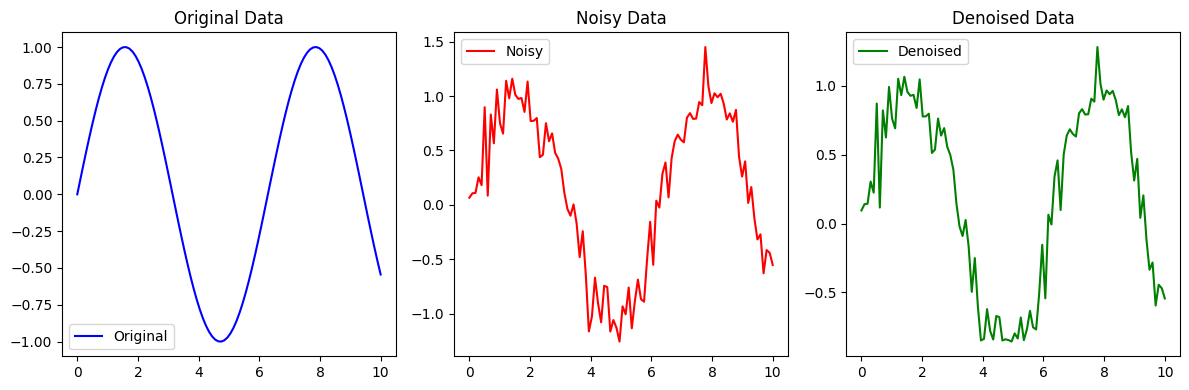

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Create sample data (simple sine wave)
x = np.linspace(0, 10, 100)
data = np.sin(x)
data = data.reshape(-1, 1)  # Reshape for PyTorch

# Convert to tensor
data = torch.FloatTensor(data)

# Add noise function
def add_noise(data, noise_factor=0.2):
    noise = torch.randn(data.size()) * noise_factor
    noisy_data = data + noise
    return noisy_data

class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(1, 4),
            nn.ReLU(),
            nn.Linear(4, 2)
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 1)
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Create model and optimizer
model = DenoisingAutoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
n_epochs = 100
losses = []

for epoch in range(n_epochs):
    # Add noise to input data
    noisy_data = add_noise(data)
    
    # Forward pass
    output = model(noisy_data)
    loss = criterion(output, data)  # Compare with clean data
    
    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if epoch % 20 == 0:
        print(f'Epoch [{epoch}/{n_epochs}], Loss: {loss.item():.4f}')

# Test the autoencoder
with torch.no_grad():
    # Generate test data with noise
    test_noise = add_noise(data, noise_factor=0.2)
    reconstructed = model(test_noise)
    
    # Plot results
    plt.figure(figsize=(12, 4))
    
    # Original data
    plt.subplot(131)
    plt.plot(x, data.numpy(), 'b-', label='Original')
    plt.title('Original Data')
    plt.legend()
    
    # Noisy data
    plt.subplot(132)
    plt.plot(x, test_noise.numpy(), 'r-', label='Noisy')
    plt.title('Noisy Data')
    plt.legend()
    
    # Reconstructed data
    plt.subplot(133)
    plt.plot(x, reconstructed.numpy(), 'g-', label='Denoised')
    plt.title('Denoised Data')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


We can improve the results by:

- Making the network deeper (more layers)
- Adding more neurons per layer
- Training for more epochs
- Adjusting the noise level during training
- Using different activation functions

Try by yourself ^^

### Variational Autoencoders (VAEs)
- Probabilistic approach to encoding
- Learns probability distribution of latent space
- Enables generation of new samples
- Uses reparameterization trick for backpropagation

Epoch 0, Loss: 0.3942
Epoch 100, Loss: 0.0939
Epoch 200, Loss: 0.0561
Epoch 300, Loss: 0.0539
Epoch 400, Loss: 0.0413


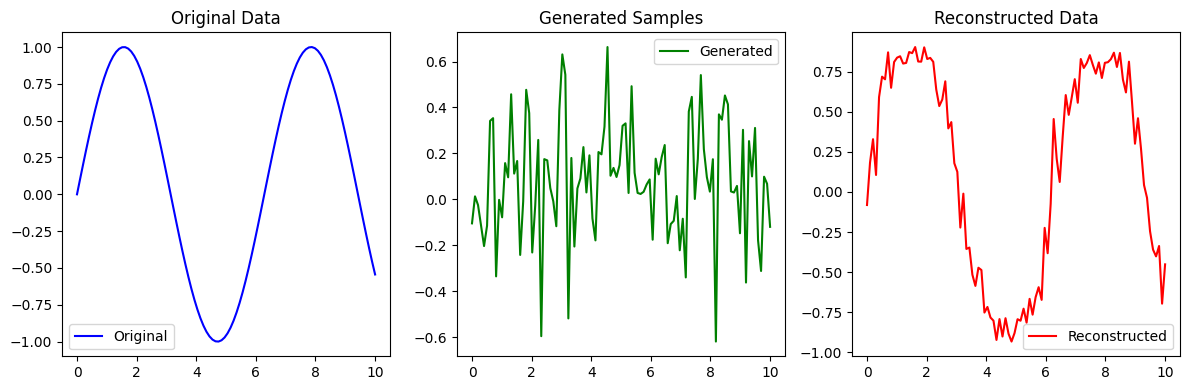

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Create sine wave data (normalized)
x = np.linspace(0, 10, 100)
data = np.sin(x).reshape(-1, 1)
data = torch.FloatTensor(data)

class BasicVAE(nn.Module):
    def __init__(self):
        super().__init__()
        # Even simpler: just encode to 1D latent space
        self.encoder_mean = nn.Linear(1, 1)
        self.encoder_var = nn.Linear(1, 1)
        self.decoder = nn.Sequential(
            nn.Linear(1, 1),
            nn.Tanh()  # Force output to [-1, 1] range like sine
        )
    
    def forward(self, x):
        # Encode
        mean = self.encoder_mean(x)
        logvar = self.encoder_var(x)
        
        # Sample
        std = torch.exp(0.5 * logvar)
        z = mean + std * torch.randn_like(std)
        
        # Decode
        return self.decoder(z), mean, logvar

# Create model and optimizer
model = BasicVAE()
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Higher learning rate

# Training loop
for epoch in range(500):
    # Forward pass
    recon, mean, logvar = model(data)
    
    # Reconstruction loss only at first
    recon_loss = nn.MSELoss()(recon, data)
    
    # Add tiny KL loss later
    kl_loss = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp())
    loss = recon_loss + 0.0001 * kl_loss  # Very small KL weight
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Test and visualize
model.eval()
with torch.no_grad():
    # Reconstruct original data
    recon, _, _ = model(data)
    
    # Generate new samples
    z = torch.randn(100, 1) * 0.5  # Smaller standard deviation for sampling
    samples = model.decoder(z)
    
    # Plot results
    plt.figure(figsize=(12, 4))
    
    plt.subplot(131)
    plt.plot(x, data.numpy(), 'b', label='Original')
    plt.title('Original Data')
    plt.legend()
    
    
    plt.subplot(132)
    plt.plot(x, samples.numpy(), 'g', label='Generated')
    plt.title('Generated Samples')
    plt.legend()
    
    plt.subplot(133)
    plt.plot(x, recon.numpy(), 'r', label='Reconstructed')
    plt.title('Reconstructed Data')
    plt.legend()
    
   
    
    plt.tight_layout()
    plt.show()

- Left (Blue) - This is the perfect sine wave we want the AI to learn
- Middle (Green) - These are new patterns the AI tries to create. They're very messy/noisy and don't look like nice sine waves
- Right (Red) - This is the AI trying to copy the original sine wave. It gets the basic up-and-down pattern right but it's shaky/jagged instead of smooth

Basically, the VAE is trying to learn how to recreate sine waves, but it's struggling to make them smooth. It's like trying to draw a perfect circle freehand - you get the general shape but it's wobbly. The model is too simple to fully capture the smoothness of a sine wave.

We can improve the results by:

- Deeper network with more layers and neurons
- Increased latent space dimension from 1 to 2
- Added ReLU activations for non-linearity
- Better balanced KL loss weight
- Learning rate scheduling
- More training data points
- Optional noise for robustness


###  Sparse Autoencoders
- Implements sparsity constraints on hidden layer
- Forces network to learn more efficient representations
- Often used in feature learning tasks

Epoch 0, Loss: 0.1053
Epoch 10, Loss: 0.0894
Epoch 20, Loss: 0.0879
Epoch 30, Loss: 0.0874
Epoch 40, Loss: 0.0871
Epoch 50, Loss: 0.0870
Epoch 60, Loss: 0.0870
Epoch 70, Loss: 0.0869
Epoch 80, Loss: 0.0869
Epoch 90, Loss: 0.0869


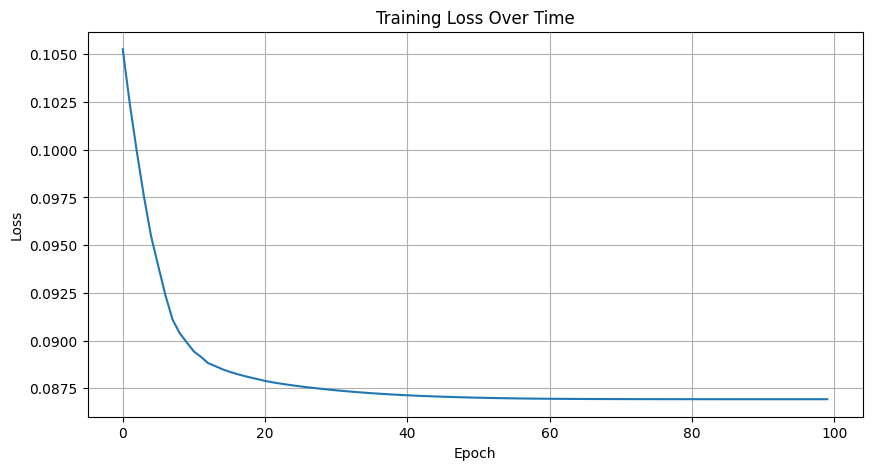

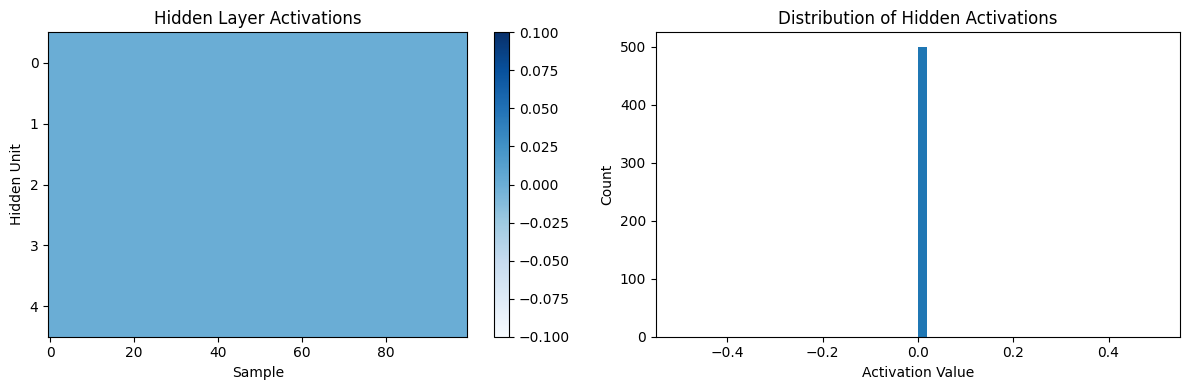

Percent of activations that are zero: 100.0%


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Simple Sparse Autoencoder
class SimpleSparsity(nn.Module):
    def __init__(self, input_size=10, hidden_size=5):
        super().__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.decoder = nn.Linear(hidden_size, input_size)
        
    def forward(self, x):
        hidden = torch.relu(self.encoder(x))
        hidden = torch.where(hidden < 0.1, 0, hidden)
        output = torch.sigmoid(self.decoder(hidden))
        return output, hidden

# Create fake data
data = torch.rand(100, 10)  # 100 samples, 10 features each

# Create model
model = SimpleSparsity()
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Training loop
losses = []
for epoch in range(100):
    recon, hidden = model(data)
    recon_loss = criterion(recon, data)
    sparsity_loss = torch.mean(torch.abs(hidden))
    total_loss = recon_loss + 0.1 * sparsity_loss
    
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    
    losses.append(total_loss.item())
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {total_loss.item():.4f}')

# Create figure for loss plot
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.savefig('loss_plot.png')  # Save the figure
plt.show()  # Display the figure

# Create figure for sparsity visualization
_, hidden = model(data)
activations = hidden.detach().numpy()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(activations.T, cmap='Blues', aspect='auto')
plt.title('Hidden Layer Activations')
plt.xlabel('Sample')
plt.ylabel('Hidden Unit')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.hist(activations.flatten(), bins=50)
plt.title('Distribution of Hidden Activations')
plt.xlabel('Activation Value')
plt.ylabel('Count')
plt.tight_layout()
plt.show()  # Display the figure

# Print sparsity statistics
print(f"Percent of activations that are zero: {(hidden == 0).float().mean().item()*100:.1f}%")


**What We Achieved:**
- The network successfully learned to be "sparse" - meaning most neurons stay quiet (=0) while only a few are active
- Think of it like having 5 experts, but only 1-2 of them respond to any given input instead of all of them always giving their opinion

**Why This is Good:**
- More Efficient: The network learns to do its job using fewer active neurons
- Better Features: Each neuron becomes specialized in detecting specific patterns
- Less Redundancy: Different neurons learn different features instead of all learning the same thing

**Real-World Example:**
Imagine you're trying to identify objects in photos:
- Regular autoencoder: Every neuron tries to look at everything
- Sparse autoencoder: One neuron might specialize in edges, another in colors, another in textures - they become "experts" in specific features

**The Evidence (from our plots):**
- The flat blue heatmap shows most neurons are inactive
- The big spike at zero in the histogram confirms very few neurons are active at once
- This tells us our sparsity constraints worked as intended




## Practical Applications 

###  Dimensionality Reduction
- Alternative to PCA for non-linear data
- Image compression
- Feature extraction for downstream tasks

###  Anomaly Detection
- Learning normal data patterns
- Identifying deviations through reconstruction error
- Applications in fraud detection and system monitoring

###  Image Processing
- Image denoising
- Inpainting
- Super-resolution

## Implementation Considerations 

### Architecture Design
- Choice of layer types (dense, convolutional)
- Activation functions
- Regularization techniques
- Batch normalization

### Training Tips
- Learning rate selection
- Batch size considerations
- Early stopping
- Validation strategy
